In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [26]:
df_raw = pd.read_csv('../data/raw/calcofi.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  817509 non-null  float64
 1   T_degC  853900 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


In [27]:
df_raw.sample(10)

,Salnty,T_degC
166400,33.471,15.23
56664,33.884,9.25
668543,33.252,16.11
686855,33.277,15.24
648349,34.328,6.23
579669,34.185,9.44
37600,34.340,7.76
514872,32.760,13.38
455433,34.050,7.62
596564,33.718,10.01


In [28]:
df_processed = df_raw.copy()
df_processed = df_processed.dropna(axis=0).sample(300, random_state=1931).reset_index(drop=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [29]:
df_processed.to_csv('../data/processed/calcofi_processed.csv')

In [30]:
df = df_processed.copy()

In [31]:
X = df[["Salnty"]]
y = df["T_degC"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1948)

In [32]:
df_train = pd.DataFrame({'Salinity': X['Salnty'], 'Temperature': y})

In [33]:
df_train.describe()

,Salinity,Temperature
count,300.000000,300.000000
mean,33.822477,10.378527
std,0.473844,3.903148
min,32.767000,1.520000
25%,33.428250,7.730000
50%,33.866500,9.725000
75%,34.215750,12.742500
max,35.214000,26.640000


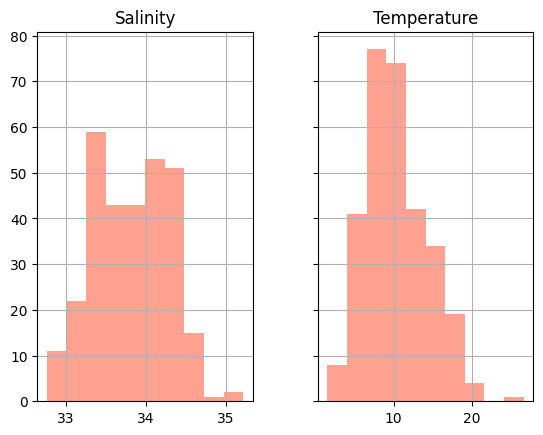

In [34]:
df_train.hist(sharey=True, color='Tomato', alpha=0.6)
plt.show()

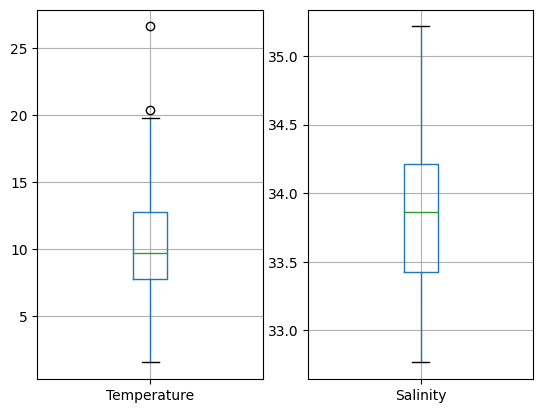

In [35]:
fig,ax = plt.subplots(1,2)

df_train[['Temperature']].boxplot(ax=ax[0])
df_train[['Salinity']].boxplot(ax=ax[1])
plt.show()

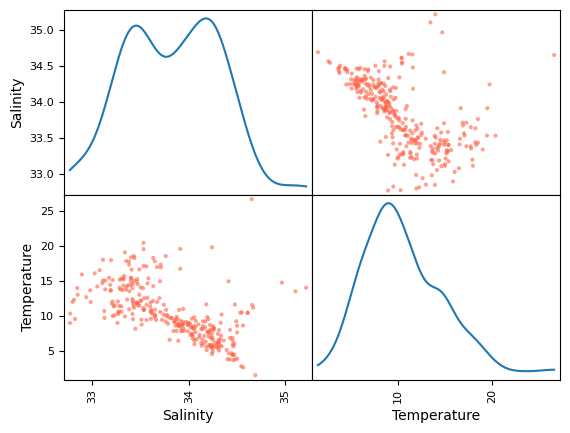

In [36]:
pd.plotting.scatter_matrix(df_train, diagonal='kde', color='tomato', alpha=0.6)
plt.show()

In [37]:
skmodel = LinearRegression()
skmodel.fit(X_train, y_train)
y_hat = skmodel.predict(X_test)
print(f"R2: {r2_score(y_test, y_hat):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_hat):.4f}")

R2: 0.4264
MSE: 7.6240


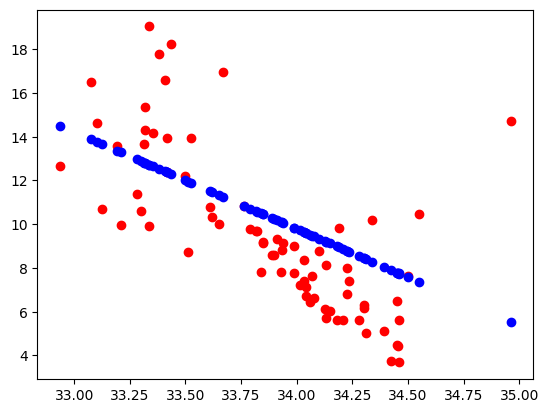

In [38]:
plt.scatter(x=X_test, y=y_test, color='Red')
plt.scatter(x=X_test, y=y_hat, color='Blue')
plt.show()

In [39]:
stmodel = smf.ols('Temperature ~ Salinity', data=df_train).fit()
print(stmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.78e-28
Time:                        01:56:39   Log-Likelihood:                -771.94
No. Observations:                 300   AIC:                             1548.
Df Residuals:                     298   BIC:                             1555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    172.2430     13.137     13.111      0.0

In [45]:
y_train_hat = skmodel.predict(X_train)
y_train_hat.shape

(225,)

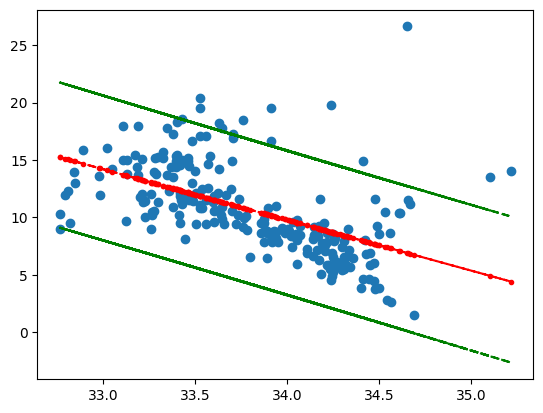

In [48]:
y_hat_st = stmodel.get_prediction()
ci_l = y_hat_st.summary_frame()['obs_ci_lower']
ci_u = y_hat_st.summary_frame()['obs_ci_upper']
fig,ax = plt.subplots()
ax.plot(X_train, y_train, 'o', label='data')
ax.plot(X_train, y_train_hat, 'r--.', label='ols')
ax.plot(X, ci_l, 'g--')
ax.plot(X, ci_u, 'g--')

In [47]:
ci_l.shape

(300,)